First of all, a few notes:
* Getting to know ENCODE might be challenging. So please, attend the seminar.
* Check the first homework for a quick reminder on general rules.
* Leave as many comments as possible: this way, both you and I will know that you understand your code.

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

# Introduction [1.0]

This homework is heavily based on the seminar material. Make sure you have it at hand - it should help a lot.

And yes, extra will require you to do the same thing TWICE, minus the machine learning part.

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

So either copy&paste your code from the main part, or wrap your code in functions beforehand to make it reusable.

## Know your protocols

During the seminar, we covered basic ideas behind ChIP/ATAC-seq protocols. However, you must understand your data clearly before analyzing it.

So here are a few questions:
* [0.2] List the main experimental(!) steps of the ChIP-seq protocol, its main advantages, and limitations.

→

* Formation of reversible crosslinking between DNA and proteins interacting with it (usually by formaldehyde treatment)

* DNA isolation and fragmentation by ultrasound or endonucleases

* Deposition by antibodies specific to the studied protein

* Destruction of crosslinking between protein and DNA, purification of DNA

In the case of ChIP sequencing (-seq), the resulting DNA fragments undergo amplification (artificial duplication of fragments) and sequencing. The obtained data are subject to quality control, filtered, aligned to the DNA sequence and processed by special programs.


| **Pros** | **Cons** |
|:----------:|:----------:|
| High sensitivity    |  Limited resolution   |
| Genome-wide coverage   | Requires specific antibodies  |
| Specificity    | Technically difficult   |



* [0.2] Please, do the same for the ATAC-seq protocol.

→ Please, fuck off with this questions. They don't weight but weight at the same time.

* Cell Lysis, which is used to open up the cells and release the DNA.

* Cut into pieces using transposase

* Library prep and sequencing

* Peak calling (finding out which chromatine parts are most accessible)

| **Pros** | **Cons** |
|:----------:|:----------:|
| High reolution    |  Expensive   |
| Possible to study chromatine in dinamic   | Extremely dependent on the quality of dna sequencing  |

* [0.1] Are these experiments universal, or should they be repeated for each culture of interest? Why?

→ They are not universal and should be repeated. This comes just from logic and dedication to observe different conditions, regulatory elements and use different technical variations.

* [0.3] Provide a summary of the typical bioinformatic analysis for these assays. Please, list a popular tool for the analysis and its input/output. In what standard format are results stored? (You can/should use information provided in association graph from choosen ENCODE experiment of interest)

→ Argh again

* Quality control

* Fragmentation

* Sequencing

* Peak calling


In my experiment they used pipeline called "Transcription factor ChIP-seq 2". The results of ATAC-seq and ChIP-seq analysis are typically stored in the BED format. They also used `idr==2.0.4.2, macs==2.2.4, FUCKING bedtools==2.29.0, phantompeakqualtools==1.2.1`, which allow to detect differentially replicated regions in ChIP-seq data, do the peak calling and manipulating and comparing genomic features. Typically, all these tools use BAM, BED, or GFF files as input and output lists of genomic features or peak call.

## Target transcription factors

Overall, you need to repeat our seminar work, but this time with more transcriptional factors. I deliberately did not choose any TFs for you, so you can pick your favorite one or just some proteins that look interesting to you.

Here is the task:

[0.2] Use ENCODE database and pick a tissue or cell culture with a published ATAC-seq experiment and ***3*** ChIP-seq experiments (for your favorite **transcription factors**). **Ensure all experiments are from the same culture and pass routine ENCODE checks.** Provide links to experiments and descriptions of your TFs below.

→ I've chosen these 3 CHIP in A549 cell line: [link](https://www.encodeproject.org/search/?type=Experiment&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&assay_title=TF+ChIP-seq&status=released&biosample_ontology.term_name=A549&target.label=NFE2L2&target.label=SIX5&target.label=GABPA)

ATAC-seq: [link](https://www.encodeproject.org/experiments/ENCSR032RGS/)

# Data preprocessing [2]

Remember, no code hints this time. Here is what you need to do and how it will be graded:
* [1.5] Implement the main workflow: download regions -> calculate intersections / subtractions -> get sequences -> calculate k-mers -> one-hot encode classes -> split into train and test.
* [0.5] Create a histogram showing the distribution of region sizes and calculate a table showing overlaps between all experiments. The table should look like this:


<img src="https://drive.google.com/uc?export=view&id=1mbGgAcLagrgIuYhkEST0Uo-duIfAW6oh" width="250"/>


(You don't need to make it identical to this picture. Only make sure to plot the legend and labels.)

Everything except the primary workflow is extra. You can ignore it and reuse the code from the seminar if you want.

**Hints:**
* Remember to subsample the data: around 3k examples for each TF and 9k-27k for the background class. Obviously, you should use subsampling only for prototyping and HW, but not when training/tuning a real-world model.
* Binding sites for TF can overlap; this is expected. However, here we will use a simplistic worldview and drop such situations. That is, you need to keep and process only specific sites for each TF. If it's not possible - pick a different set of transcription factors.
* Comment and describe! To give you a high grade, we need to understand that you interpreted all results correctly.

## Libs installation

In [ ]:
!apt install -qy bedtools
!pip install pybedtools biopython # Error if bedtools is not installed as app

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 1s (668 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 86.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 M

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
from Bio import SeqIO
from pybedtools import BedTool



sns.set_style("darkgrid")

In [ ]:
# Chip-seqs
!wget -q -O NFE2L2-Chip.bed.gz https://www.encodeproject.org/files/ENCFF827MYW/@@download/ENCFF827MYW.bed.gz
!wget -q -O SIX5-Chip.bed.gz https://www.encodeproject.org/files/ENCFF868TYP/@@download/ENCFF868TYP.bed.gz
!wget -q -O GABPA-Chip.bed.gz https://www.encodeproject.org/files/ENCFF343BIK/@@download/ENCFF343BIK.bed.gz

# Atac-seqs
!wget -q -O ATAC1.bed.gz https://www.encodeproject.org/files/ENCFF674RFR/@@download/ENCFF674RFR.bed.gz
!wget -q -O ATAC2.bed.gz https://www.encodeproject.org/files/ENCFF429FOV/@@download/ENCFF429FOV.bed.gz

!gzip -d *.gz

In [ ]:
# .sort() is required to effectively subtract/intersect regions later
chip_nfe2l2 = BedTool("NFE2L2-Chip.bed").sort()
chip_six5 = BedTool("SIX5-Chip.bed").sort()
chip_gabpa = BedTool("GABPA-Chip.bed").sort()

atac1 = BedTool("ATAC1.bed").sort()
atac2 = BedTool("ATAC2.bed").sort()

In [ ]:
# Working with ATAC

# Final ATAC peaks is a simple intersection
atac = atac1.intersect(atac2).sort()

# Remove weakly-replicated regions from MYC
atac1_only = atac1.subtract(atac2).sort()
atac2_only = atac2.subtract(atac1).sort()
# cat = concat 2 BED files
atac_not_replicated = atac1_only.cat(atac2_only).sort()

chip_nfe2l2 = chip_nfe2l2.subtract(atac_not_replicated).sort()
chip_six5 = chip_six5.subtract(atac_not_replicated).sort()
chip_gabpa = chip_gabpa.subtract(atac_not_replicated).sort()

# Sanity check
assert atac.intersect(atac_not_replicated).total_coverage() == 0

In [ ]:
# -wa means "keep a whole chip_nfe2l2 peak in case of an overlap with ATAC-seq"
fg_nfe2l2 = chip_nfe2l2.intersect(atac, wa=True, u=True).sort()
fg_six5 = chip_six5.intersect(atac, wa=True, u=True).sort()
fg_gabpa = chip_gabpa.intersect(atac, wa=True, u=True).sort()

# -A means "remove entire ATAC peaks overlapping all gene peaks"
bg = atac.subtract(chip_nfe2l2, A=True).sort().subtract(chip_six5, A=True).sort().subtract(chip_gabpa, A=True).sort()

# Sanity check
assert fg_nfe2l2.intersect(bg).total_coverage() == 0 and fg_six5.intersect(bg).total_coverage() == 0 and fg_gabpa.intersect(bg).total_coverage() == 0

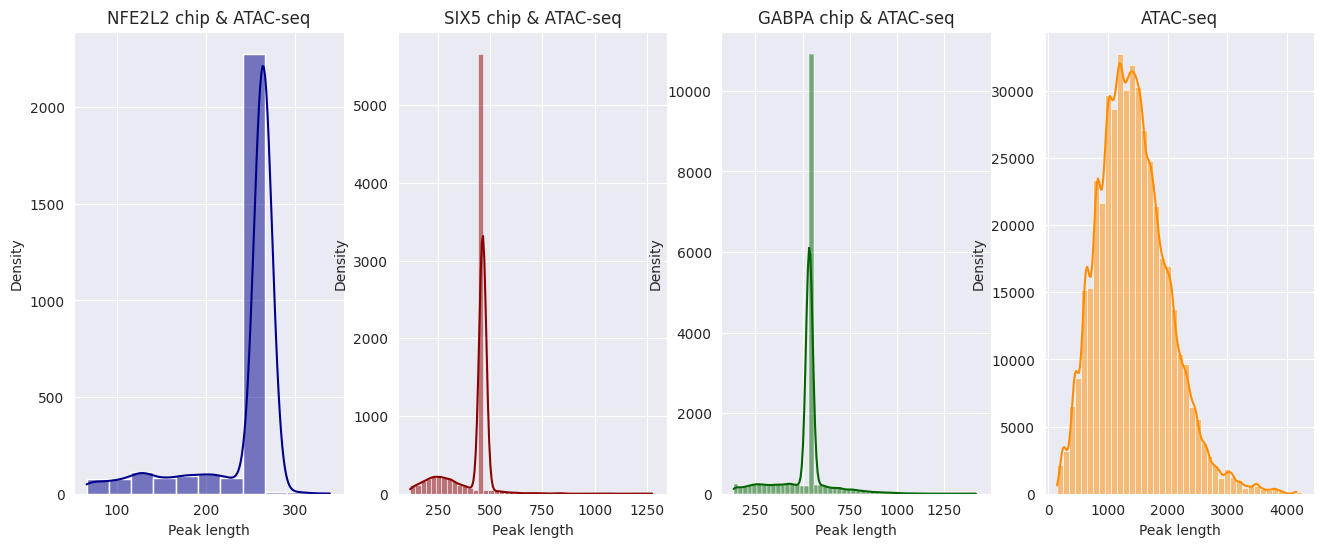

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

for title, regions, bw, ax, color in \
    ("NFE2L2 chip & ATAC-seq", fg_nfe2l2, 25, axes[0], "darkblue"), \
    ("SIX5 chip & ATAC-seq", fg_six5, 25, axes[1], "darkred"), \
    ("GABPA chip & ATAC-seq", fg_gabpa, 25, axes[2], "darkgreen"), \
    ("ATAC-seq", bg, 100, axes[3], "darkorange"):
    # plot the histogram
    sns.histplot([x.length for x in regions], binwidth=bw, kde=True, ax=ax, color=color)
    # add labels
    ax.set(title=title, xlabel="Peak length", ylabel="Density")

In [ ]:
for obj, name in (fg_nfe2l2, "NFE2L2"), (fg_six5, "SIX5"),  (fg_gabpa, "GABPA"):
  print("Processing", name)
  lengths = [x.length for x in obj]
  cnts = Counter(lengths)
  total = sum(cnts.values())

  cnts = sorted(cnts.items(), key=lambda x: x[1], reverse=True)
  for k, v in cnts[:10]:
    print(f"{k} -> {v} ({v / total * 100:.2f}%)")
  print("\n")

Processing NFE2L2
264 -> 2247 (77.06%)
66 -> 19 (0.65%)
127 -> 9 (0.31%)
124 -> 8 (0.27%)
153 -> 8 (0.27%)
231 -> 7 (0.24%)
136 -> 7 (0.24%)
217 -> 7 (0.24%)
202 -> 7 (0.24%)
196 -> 7 (0.24%)


Processing SIX5
464 -> 5618 (71.73%)
116 -> 21 (0.27%)
231 -> 20 (0.26%)
238 -> 15 (0.19%)
280 -> 14 (0.18%)
306 -> 14 (0.18%)
267 -> 13 (0.17%)
214 -> 13 (0.17%)
270 -> 13 (0.17%)
307 -> 13 (0.17%)


Processing GABPA
536 -> 10693 (66.26%)
134 -> 36 (0.22%)
268 -> 22 (0.14%)
620 -> 20 (0.12%)
660 -> 19 (0.12%)
440 -> 17 (0.11%)
481 -> 17 (0.11%)
257 -> 17 (0.11%)
377 -> 17 (0.11%)
250 -> 16 (0.10%)




In [ ]:
# Download the genome from the Google Cloud
!gsutil -m cp \
  "gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai" \
  "gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta" \
  .

Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai...
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

- [2/2 files][  3.0 GiB/  3.0 GiB] 100% Done  71.3 MiB/s ETA 00:00:00           
Operation completed over 2 objects/3.0 GiB.                                      


In [ ]:
fasta = "Homo_sapiens_assembly38.fasta"

# Fetch target sequences from the genome
# seqfn - path to final FASTA file
fg_nfe2l2_seq = fg_nfe2l2.sequence(fi=fasta).seqfn
fg_six5_seq = fg_six5.sequence(fi=fasta).seqfn
fg_gabpa_seq = fg_gabpa.sequence(fi=fasta).seqfn

bg_seq = bg.sequence(fi=fasta).seqfn

In [ ]:
fg_nfe2l2_seq = [str(x.seq) for x in SeqIO.parse(fg_nfe2l2_seq, format='fasta')]
fg_six5_seq = [str(x.seq) for x in SeqIO.parse(fg_six5_seq, format='fasta')]
fg_gabpa_seq = [str(x.seq) for x in SeqIO.parse(fg_gabpa_seq, format='fasta')]
bg_seq = [str(x.seq) for x in SeqIO.parse(bg_seq, format='fasta')]

# Sanity check
print(f"NFE2L2 Before \t fg: {len(fg_nfe2l2_seq)}; bg: {len(bg_seq)}")
print(f"SIX5   Before \t fg: {len(fg_six5_seq)}; bg: {len(bg_seq)}")
print(f"GABPA  Before \t fg: {len(fg_gabpa_seq)}; bg: {len(bg_seq)}")

NFE2L2 Before 	 fg: 2916; bg: 450361
SIX5   Before 	 fg: 7832; bg: 450361
GABPA  Before 	 fg: 16137; bg: 450361


In [ ]:
np.random.seed(1337)
fg_nfe2l2_seq = np.random.choice(fg_nfe2l2_seq, size=2000, replace=False)
fg_six5_seq = np.random.choice(fg_six5_seq, size=2000, replace=False)
fg_gabpa_seq = np.random.choice(fg_gabpa_seq, size=2000, replace=False)

bg_seq = np.random.choice(bg_seq, size=8000, replace=False)
print(f"NFE2L2 After \t fg: {len(fg_nfe2l2_seq)}; bg: {len(bg_seq)}")
print(f"SIX5   After \t fg: {len(fg_six5_seq)}; bg: {len(bg_seq)}")
print(f"GABPA  After \t fg: {len(fg_gabpa_seq)}; bg: {len(bg_seq)}")

NFE2L2 After 	 fg: 2000; bg: 8000
SIX5   After 	 fg: 2000; bg: 8000
GABPA  After 	 fg: 2000; bg: 8000


In [ ]:
# Inefficient but simple implementation
def calculate_kmers(seq: str, klen: int):
  assert len(seq) >= klen and klen >= 1, seq
  total_kmers = len(seq) - klen + 1

  counts = defaultdict(int)
  for ind in range(total_kmers):
    window = seq[ind:ind+klen]
    counts[window] += 1

  # Exclude non-ATGC k-mers
  counts = {
      k: v for k, v in counts.items() if {"A", "C", "G", "T"}.issuperset(set(k))
  }

  # Calculate frequencies
  total_kmers = sum(counts.values())
  frequencies = {k: v / total_kmers for k, v in counts.items()}
  return frequencies

In [ ]:
# List of dictionaries (cls + features) - future DataFrame
df = []
for cls, sequences in (0, bg_seq), (1, fg_nfe2l2_seq), (2, fg_six5_seq), (3, fg_gabpa_seq):
  for seq in sequences:
    record = {}
    for klen in 1, 2, 3, 4, 5:
      record.update(calculate_kmers(seq, klen))
    record['Class'] = cls
    df.append(record)

In [ ]:
import pandas as pd

df = pd.DataFrame(df).fillna(0)
df.head()

,T,G,C,A,TG,GT,TC,CT,TT,TA,...,ACGTC,TATCG,ATCGA,CTACG,ATAGG,ACGAC,CGACA,CGTTA,CGTAT,TACGT
0,0.293689,0.217638,0.171521,0.317152,0.068016,0.066397,0.049393,0.063968,0.094737,0.081781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.254781,0.221995,0.261612,0.261612,0.063568,0.043062,0.071087,0.077922,0.075871,0.044429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.265018,0.216726,0.197880,0.320377,0.071934,0.047170,0.057783,0.079009,0.069575,0.066038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.256726,0.207399,0.269058,0.266816,0.066218,0.040404,0.071829,0.094276,0.068462,0.050505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.266819,0.232611,0.306727,0.193843,0.082192,0.053653,0.075342,0.093607,0.071918,0.036530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,T,G,C,A,TG,GT,TC,CT,TT,TA,...,ACGTC,TATCG,ATCGA,CTACG,ATAGG,ACGAC,CGACA,CGTTA,CGTAT,TACGT
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.229111,0.271139,0.270721,0.229029,0.070694,0.048910,0.061335,0.075111,0.061660,0.035394,...,0.000342,0.000095,0.000134,0.000231,0.000474,0.000209,0.000278,0.000161,0.000128,0.000176
std,0.058003,0.059954,0.059445,0.058004,0.017128,0.012505,0.014489,0.016006,0.030614,0.020318,...,0.000873,0.000410,0.000500,0.000683,0.000987,0.000657,0.000730,0.000582,0.000509,0.000608
min,0.057971,0.075099,0.100000,0.040359,0.003676,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.184753,0.224914,0.224310,0.184382,0.058824,0.041037,0.052336,0.064820,0.038014,0.019113,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.225916,0.269231,0.269397,0.225746,0.070773,0.048003,0.060475,0.074434,0.057034,0.030594,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.271713,0.314887,0.314168,0.271552,0.081553,0.056075,0.069114,0.084233,0.081013,0.049430,...,0.000000,0.000000,0.000000,0.000000,0.000645,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.450758,0.519774,0.542601,0.542857,0.188785,0.171103,0.168285,0.182540,0.235294,0.137931,...,0.013043,0.007519,0.009174,0.011538,0.015873,0.014493,0.011364,0.012987,0.011494,0.016949


In [ ]:
df['Class'].value_counts()

0    8000
1    2000
2    2000
3    2000
Name: Class, dtype: int64

Self-check here!

Make sure that after this section, you have the following:
* `Xtrain`/`Xtest` - table with k-mers, features for our sequences
* `Ytrain`/`Ytest` - table with 4 one-hot-encoded columns, one for each class (background + 3 TFs)

# Machine learning [5.5]

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

## Model training

Time to train our fit-predict skills! Your main task is to:
* [0.5] Select proper target metric(s). Do you want to use micro- or macro-averaging? Justify your choice.
* [1] Train and optimize hyperparameters for the following models: Logistic regression, Decision tree, Random Forest, SVM, and KNN (GB is optional).
* [0.5] Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != "Class"], df.Class, test_size=0.2, random_state=1337)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11200, 1364), (2800, 1364), (11200,), (2800,))

In [ ]:
y_train.value_counts(), y_test.value_counts()

(0    6382
 3    1621
 1    1609
 2    1588
 Name: Class, dtype: int64,
 0    1618
 2     412
 1     391
 3     379
 Name: Class, dtype: int64)

it is imbalanced already, thus I'll be using `macro-f1`. It allows to measure quality with taking into account skewness of classes.

Also, there is `f1_samples` which is truly meaningful for multilabel classification

In [ ]:
y_train = pd.concat([y_train, pd.get_dummies(y_train)], axis=1).drop("Class", axis=1).rename(columns={0: "background", 1: "NFE2L2", 2:"SIX5", 3:"GABPA"})
y_test = pd.concat([y_test, pd.get_dummies(y_test)], axis=1).drop("Class", axis=1).rename(columns={0: "background", 1: "NFE2L2", 2:"SIX5", 3:"GABPA"})

y_train.shape, y_test.shape

((11200, 4), (2800, 4))

In [ ]:
y_test

,background,NFE2L2,SIX5,GABPA
5930,1,0,0,0
3278,1,0,0,0
5368,1,0,0,0
13316,0,0,0,1
8928,0,1,0,0
...,...,...,...,...
11121,0,0,1,0
9229,0,1,0,0
8233,0,1,0,0
3740,1,0,0,0


In [ ]:
# Standard Scaling
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
tree_param_grid = {
    "criterion": ["gini"],
    "max_depth": [9],
    "max_features": ["sqrt"],
}

tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param_grid,
                           cv=10, scoring="f1_macro", n_jobs=-1).fit(X_train, y_train)

print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}
Best cross validaton score 0.5414203427089509


In [ ]:
forest_param_grid = {
    "n_estimators": [5],
    "criterion": ["gini",],
    "max_depth": [14],
    "max_features": ["auto"],
}

forest_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid=forest_param_grid,
                           cv=10, scoring="f1_macro", n_jobs=-1).fit(X_train, y_train)

print("Best params:", forest_grid.best_params_)
print("Best cross validaton score", forest_grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best params: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 5}
Best cross validaton score 0.631304569720401


These were light algorithms thus `CV=10`, later all `cv=3` just to save time. It took too long to compute even without normal grids. And yes, I used RandomSearchCV before.

In [ ]:
# Errors appeared cuz of C constraint in logreg

logreg_param_grid = {
    "estimator__penalty": ["l1"],
    "estimator__solver": ["saga"],
    "estimator__C": [1000]
}

model = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)

logreg_grid = GridSearchCV(model, param_grid=logreg_param_grid,
                           cv=3, scoring="f1_macro", n_jobs=-1).fit(X_train, y_train)

print("Best params:", logreg_grid.best_params_)
print("Best cross validaton score", logreg_grid.best_score_)

Best params: {'estimator__C': 1000, 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}
Best cross validaton score 0.4926875763772102


In [ ]:
# 4 часа 12 минут и дропнулся Колаб
svm_param_grid = {
  "estimator__kernel": ["rbf"],
  "estimator__C": [1],
  "estimator__degree": [3]
}


svm_grid = GridSearchCV(OneVsRestClassifier(SVC(), n_jobs=-1), param_grid=svm_param_grid,
                           cv=3, scoring="f1_macro", n_jobs=-1).fit(X_train, y_train)

print("Best params:", svm_grid.best_params_)
print("Best cross validaton score", svm_grid.best_score_)

Best params: {'estimator__C': 1, 'estimator__degree': 3, 'estimator__kernel': 'rbf'}
Best cross validaton score 0.4612759661939756


In [ ]:
# KNN >70 mins with ~10 parameters in grid

knn_param_grid = {
    'estimator__n_neighbors': list(range(1,5)),
    'estimator__weights': ['uniform'],
    'estimator__metric': ['manhattan'],
}

knn_grid = GridSearchCV(OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1), n_jobs=-1), param_grid=knn_param_grid,
                           cv=3, scoring="f1_macro", n_jobs=-1).fit(X_train, y_train)


print("Best params:", knn_grid.best_params_)
print("Best cross validaton score", knn_grid.best_score_)

Best params: {'estimator__metric': 'manhattan', 'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}
Best cross validaton score 0.344379990424235


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
cbt_param_grid = {
    "iterations": [200],
    "learning_rate":  [0.03],
    "depth": [3],
}

# It needs df["Class"] as y_test answer
cbt_grid = GridSearchCV(CatBoostClassifier(thread_count=-1, silent=True, class_weights=[1, 1, 1, 1], loss_function='MultiClass'),
                  cbt_param_grid, scoring="f1_macro", cv=3, n_jobs=-1).fit(X_train, df["Class"].iloc[y_train.index])

print("Best params:", cbt_grid.best_params_)
print("Best cross validaton score", cbt_grid.best_score_)

Best params: {'depth': 3, 'iterations': 200, 'learning_rate': 0.03}
Best cross validaton score 0.7939873116582984


## Interpretation

* [0.5] Use test set to rank optimized models. Describe and interpret results.
* [0.5]  For the model type of your choice, construct and interpret ROC curves (on the same figure) and calculate ROC AUC for:
  *  each class according to One-Vs-Rest classifier scheme
  *  micro-/macro-averaged OvR
* [0.5] Write a custom function that plots ROC curve and calculates ROC AUC.

  It should take as an input:
 * Ground-truth values for the class.
 * Probabilities predicted by the model.

  Don't use sklearn in-built functions that calculate confusion matrix values and TPR/FPR.

 *Hint: use `numpy.trapz` to calculate AUC.*

  Compare with results of sklearn implementationt.
  
* [1] Interpret features learned by each model (where applicable). Then, compare them to known TF motifs.
* [1] Implement your own version of the random forest algorithm, and compare results with the sklearn version. For simplicity, reuse sklearn DecisionTree class. Your model shouldn't support GridSearch, just fit-predict.

In [ ]:
models_dict = {"Logreg": logreg_grid.best_estimator_,
               "Decision Tree": tree_grid.best_estimator_,
               "Forest": forest_grid.best_estimator_,
               "SVC": svm_grid.best_estimator_,
               "KNN": knn_grid.best_estimator_,
               "Славянский catboost": cbt_grid.best_estimator_}

for model_name, model in models_dict.items():
  print(f"\t{model_name}")
  if model_name != "Славянский catboost":
    print(classification_report(y_test, model.predict(X_test)))
  else:
    print(classification_report(y_test, pd.get_dummies(pd.DataFrame([str(x) for x in model.predict(X_test)]))))

	Logreg
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1618
           1       0.71      0.54      0.61       391
           2       0.58      0.29      0.38       412
           3       0.23      0.08      0.12       379

   micro avg       0.74      0.64      0.68      2800
   macro avg       0.58      0.45      0.49      2800
weighted avg       0.68      0.64      0.64      2800
 samples avg       0.62      0.64      0.63      2800

	Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1618
           1       0.81      0.59      0.68       391
           2       0.52      0.34      0.41       412
           3       0.41      0.26      0.32       379

   micro avg       0.79      0.67      0.73      2800
   macro avg       0.66      0.52      0.57      2800
weighted avg       0.76      0.67      0.71      2800
 samples avg       0.67      0.67      0.67      2800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1618
           1       0.78      0.92      0.85       391
           2       0.59      0.04      0.07       412
           3       0.60      0.01      0.02       379

   micro avg       0.93      0.68      0.78      2800
   macro avg       0.74      0.48      0.47      2800
weighted avg       0.84      0.68      0.68      2800
 samples avg       0.68      0.68      0.68      2800

	KNN
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1618
           1       0.72      0.26      0.38       391
           2       0.34      0.10      0.15       412
           3       0.10      0.04      0.06       379

   micro avg       0.63      0.63      0.63      2800
   macro avg       0.46      0.35      0.35      2800
weighted avg       0.56      0.63      0.55      2800
 samples avg       0.63      0.63      0.63      2800

	Славянский catbo

**ДЕРЕВЬЯ ВПЕРЕД ДЕРЕВЬЯ ВПЕРЕД ДЕРЕВЬЯ ВПЕРЕД**

Лучшие, любимые, понятно работающие. Выделяют, сплитуют, голосуют.
Ну а бустинг просто песня (славянская)

Логистическая регрессия никакая. Здорово понимать, что этих признаков в какой-то мере достаточно для разделения таких данных, однако вау-эффекта не производит

KNN заслужил себе это место. Видать, в пространстве большой размерности разделение не такое уж и хорошее.

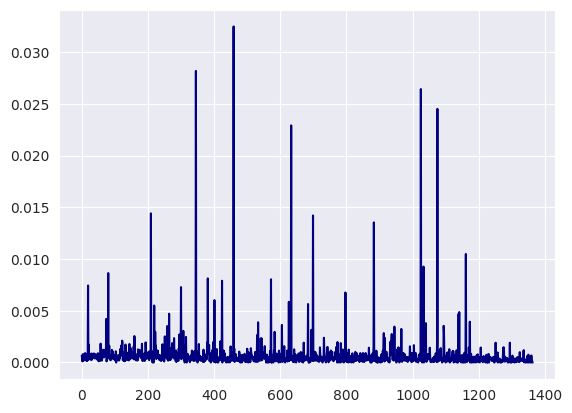

In [ ]:
plt.plot(forest_grid.best_estimator_.feature_importances_, color='navy')

Nice to see totally differnet leghts of k-mers utilized. Forest uses everything best from all parts of dataset, and I like it. We can see peaks starting from the 2-mer and ending at 5-mer.

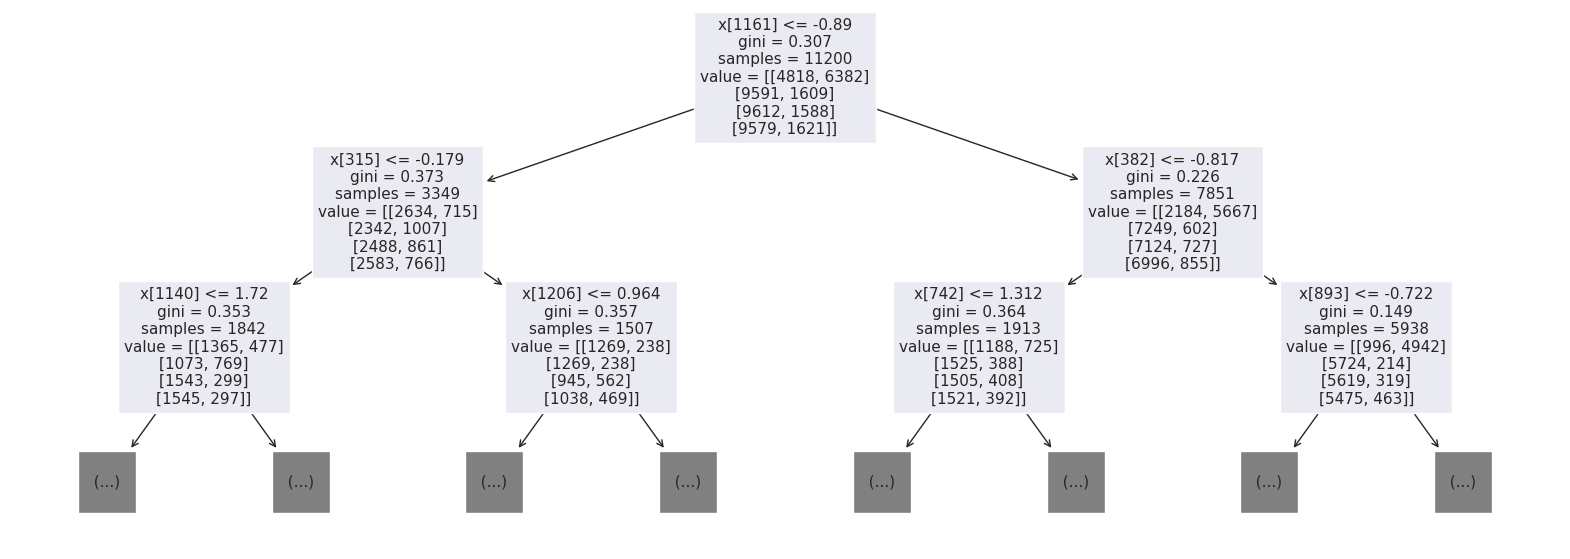

In [ ]:
plt.figure(figsize=(20, 7))
plot_tree(tree_grid.best_estimator_, max_depth=2) # Только голова. Дерево глубокое
None

In [ ]:
df.columns[[1161, 315, 382, 1140, 1206, 742, 893]]

Index(['GCCTT', 'TGCG', 'TGCCT', 'GTCAT', 'CATGA', 'ACTCA', 'CTGTC'], dtype='object')

I'll plot only part of features here. It is logical that best features are the longest kmers we have, but unexpectedily we have second splitter (left) of len 4!

[0.         0.91903585 1.        ] [0.        0.0964467 1.       ]
[0.         0.01162308 1.        ] [0.         0.68797954 1.        ]
[0.         0.06821429 1.        ] [nan nan nan]
[0.         0.06892857 1.        ] [nan nan nan]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


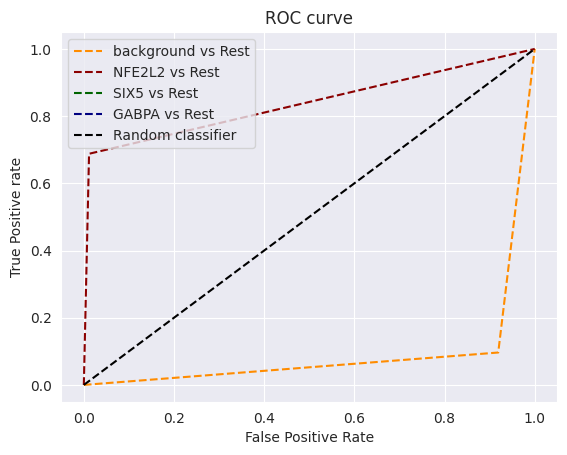

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

pr = forest_grid.best_estimator_.predict(X_test)

colors = ['darkorange','darkred','darkgreen', 'navy']
for i in range(len(np.unique(df["Class"]))):
    fpr, tpr, _ = roc_curve(y_test.to_numpy()[:, i], pr[:, i], pos_label=i)
    print(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--',color=colors[i], label=y_test.columns[i]+' vs Rest')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

Nice to see the darkorange line being below the line of random classifier. That means, that estimator catches that background class means totally opposite to NFE2L2, SIX5 and GABPA. Cool

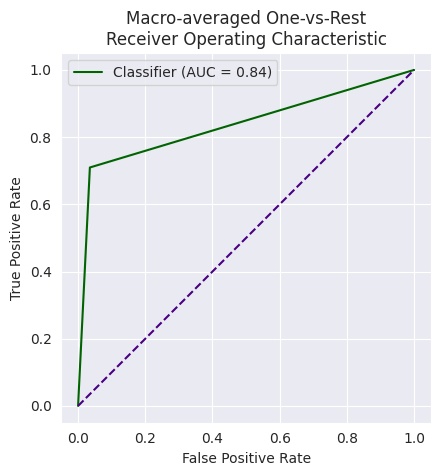

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test.to_numpy().ravel(),
    forest_grid.best_estimator_.predict(X_test).ravel(),
    color='darkgreen')
plt.plot([0, 1], [0, 1], color='indigo', linestyle='--')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()


I actually like it. Edgy, with rapid growth of TPR, not to 1, but anyway

In [ ]:
class DoomForest:
  def __init__(self, trees_number=5, criterion='gini', max_depth=10, max_features=5):
    self.trees_number = trees_number
    self.criterion = criterion
    self.max_depth = max_depth
    self.max_features = max_features
    self.trees_list = list()

  def fit(self, X, y):
    for _ in range(self.trees_number):
      log = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth,
                                   max_features=self.max_features)
      indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
      log.fit(X[indices], y.iloc[indices])
      self.trees_list.append(log)

  def predict(self, X):
    pred = np.zeros((X.shape[0], 4))
    for log in self.trees_list:
      pred += log.predict(X)
    return np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import f1_score

my_cursed_greatwood = DoomForest()
my_cursed_greatwood.fit(X_train, y_train)
pred = my_cursed_greatwood.predict(X_test)
f1_score(np.argmax(y_test.to_numpy().reshape(-1, 4), axis=1), pred, average='macro') # Либо я тут что-то намутил лишнего, либо формат неверный возвращаю. Но в целом недурно вышло

0.5945647359455314

# Extra points [1.5]

Now it's time to do the hard testing! Find another tissue/cell line where we have ATAC-seq and the same set of ChIP-seq experiments available.

Then you need to do the following:
* [0.15] Download ATAC-seq peaks, extract sequences and predict regions that each TF will bind.
* [1] Download ChIP-seq peaks, intersect with the ATAC-seq and compare them to the ML predictions. Next, calculate standard classification metrics (per-class and then macro averaged): $F_1$, precision, recall, accuracy. Drop regions thar overlap between multiple ChIP-seq experiments (like you did for the training).
* [0.35] Which model was the best in this scenario? Do we have any other criteria to rank models except for performance? What model would you use for real studies? Why?



```
#I am cat ^^
```

